In [1]:
import sklearn
print( 'The scikit learn version is {}.'.format(sklearn.__version__))

import numpy as np
import matplotlib.pyplot as plt

The scikit learn version is 1.2.1.


In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target
print(X_iris.shape, y_iris.shape)

(150, 4) (150,)


In [4]:
print(X_iris[0], y_iris[0])

[5.1 3.5 1.4 0.2] 0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 

#Get dataset with only the first two attributes 
X, y = X_iris[:, :2], y_iris

#Split the dataset into a training and testing set
#Test set will be the 25% taken randomly 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state= 33)
print(X_train.shape, y_train.shape)

#Standard the feautures 
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


(112, 2) (112,)


Text(0, 0.5, ' Sepal width')

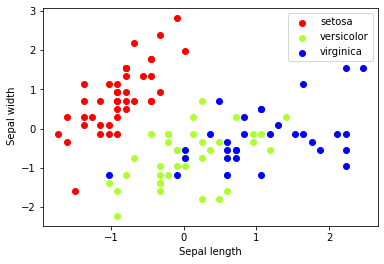

In [6]:
import matplotlib.pyplot as plt 
colors = ['red', 'greenyellow', 'blue']
for i in range(len(colors)):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel(' Sepal width')

In [7]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)

[[-33.30887615  15.75317845]
 [ -3.35540942  -8.50107503]
 [  5.84660513   0.64327588]]
[-18.35354184  -3.38296772 -10.10046191]


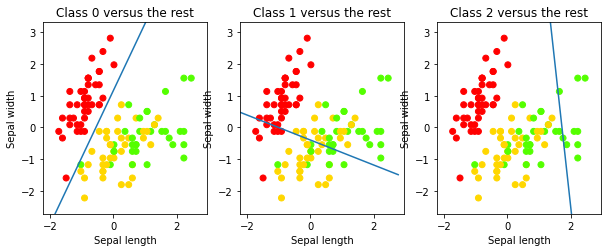

In [12]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
#error in case Xs or xs
xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(10, 6)
for i in [0, 1, 2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    #error here need plt.
    plt.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
    plt.plot(xs, ys)



In [13]:
print( clf.predict(scaler.transform([[4.7, 3.1]])) )
#[0]

print( clf.decision_function(scaler.transform([[4.7, 3.1]])) )
#[[ 19.73905808 8.13288449 -28.63499119]]

from sklearn import metrics
y_train_pred = clf.predict(X_train)
print( metrics.accuracy_score(y_train, y_train_pred) )
#0.821428571429

y_pred = clf.predict(X_test)
print( metrics.accuracy_score(y_test, y_pred) )
#0.684210526316

print( metrics.classification_report(y_test, y_pred, target_names=iris.target_names) )
#precision recall f1-score support
#setosa 1.00 1.00 1.00 8
#versicolor 0.43 0.27 0.33 11
#virginica 0.65 0.79 0.71 19
#avg / total 0.66 0.68 0.66 38

print( metrics.confusion_matrix(y_test, y_pred) )
#[[ 8 0 0]
#[ 0 3 8]
#[ 0 4 15]]


[0]
[[ 24.92998403   0.12494022 -17.40992079]]
0.8125
0.6842105263157895
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.47      0.73      0.57        11
   virginica       0.77      0.53      0.62        19

    accuracy                           0.68        38
   macro avg       0.75      0.75      0.73        38
weighted avg       0.73      0.68      0.69        38

[[ 8  0  0]
 [ 0  8  3]
 [ 0  9 10]]


In [14]:
print("My name is Ananya Singh")
print("My NetID is: as133")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Ananya Singh
My NetID is: as133
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
